In [1]:
# Start writing code here...# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Key Questions:
What variables affect the rating of an anime? <br>
Type, Studio, Release Year, Tags

In [2]:
filteredanime_data = pd.read_csv("filtered-anime-data.csv")
filteredanime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6056 entries, 0 to 6055
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6056 non-null   int64  
 1   Type          6056 non-null   object 
 2   Studio        6056 non-null   object 
 3   Tags          6056 non-null   object 
 4   Rating        6056 non-null   float64
 5   Release_year  6056 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 284.0+ KB


In [3]:
filteredanime_data.Rating.describe()

count    6056.000000
mean        3.494660
std         0.398759
min         1.300000
25%         3.270000
50%         3.490000
75%         3.750000
max         4.600000
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Count'>

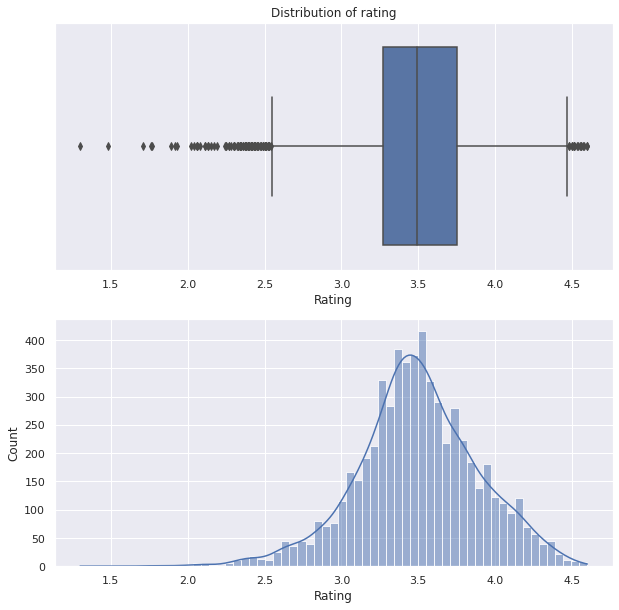

In [4]:
#For Ratings
f,axes=plt.subplots(2,figsize=(10,10))
sb.boxplot(x = filteredanime_data["Rating"], ax = axes[0]).set(title='Distribution of rating')
sb.histplot(x = filteredanime_data["Rating"], ax = axes[1], kde=True)

Seems like the median rating is 3.49 which is lower than I expected

[Text(0.5, 1.0, 'Distribution of Release_year')]

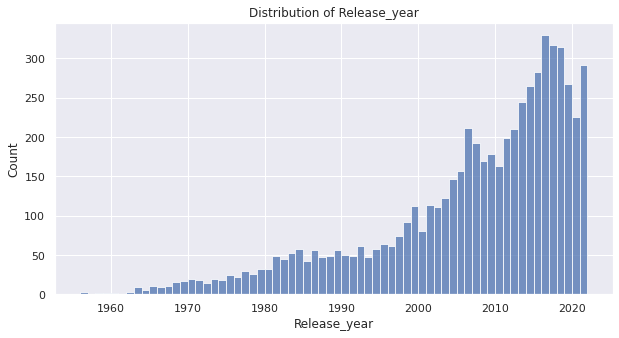

In [5]:
#For Release_Year
f,axes=plt.subplots(figsize=(10,5))
sb.histplot(x = filteredanime_data["Release_year"],binwidth=1).set(title='Distribution of Release_year')

Generally, more and more anime are getting release per year

In [6]:
filteredanime_data.Release_year = filteredanime_data.Release_year.astype(int)

Text(0.5, 1, 'Plotting Rating against Release_year')

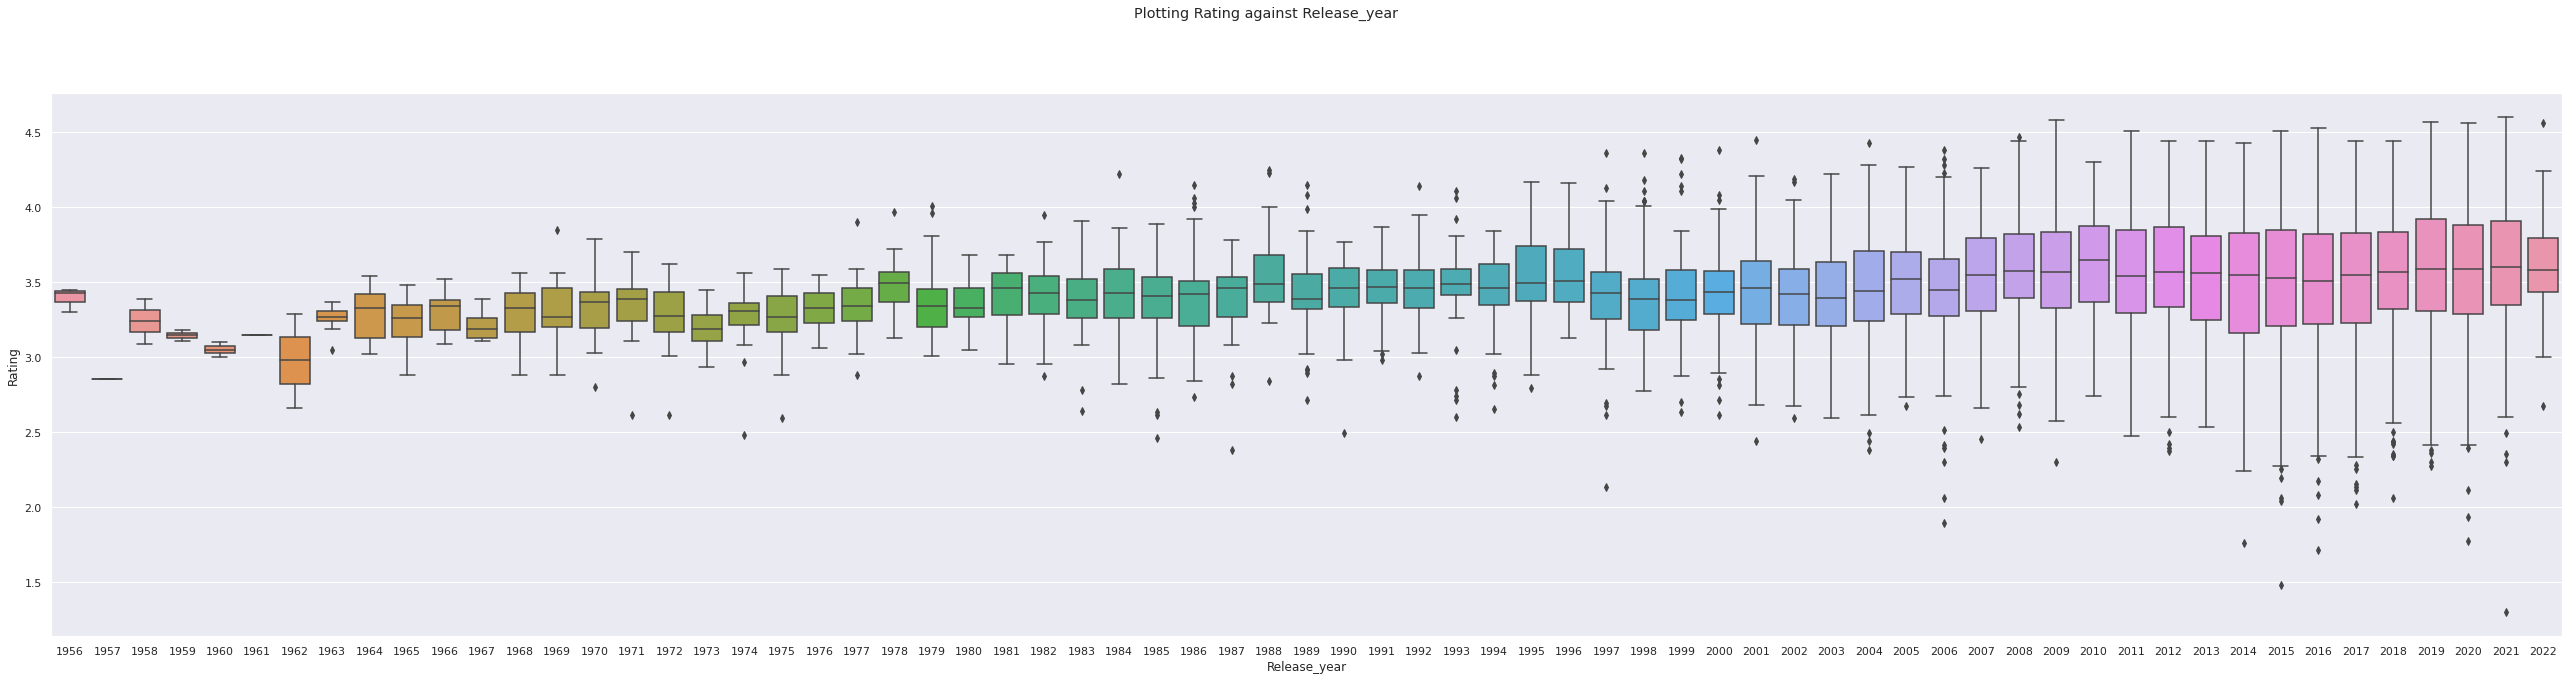

In [7]:
f,axes=plt.subplots(figsize=(45,10))
sb.boxplot(data=filteredanime_data, y="Rating", x="Release_year")
plt.suptitle("Plotting Rating against Release_year", y=1)

Its pretty clear that the correlation between year and rating is incredibly weak. Release_year wont be much of a help in predicting rating

Secondly, check Type to release_year

<AxesSubplot:xlabel='Type', ylabel='Rating'>

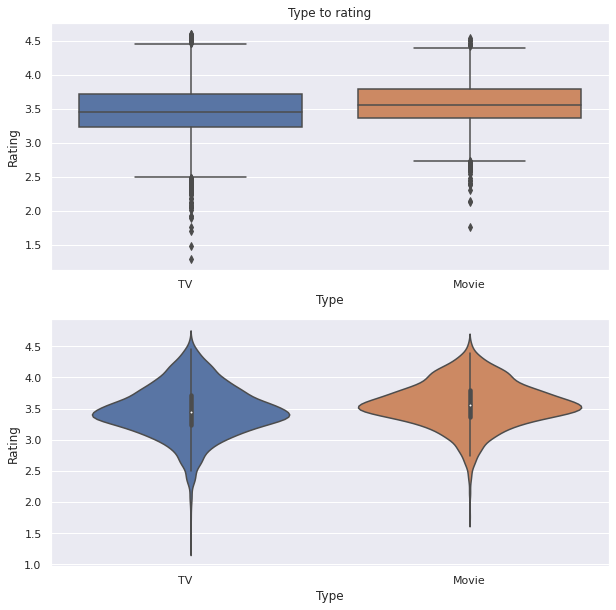

In [8]:
f,axes=plt.subplots(2,figsize=(10,10))
sb.boxplot(data=filteredanime_data, x="Type", y="Rating", ax = axes[0]).set(title='Type to rating')
sb.violinplot(data=filteredanime_data, x="Type", y="Rating", ax = axes[1])

The stats of rating for TV and Movie are surprisingly similar, Type will not be a good catergory to use for prediction of rating

Thirdly, compare studio to ratings

In [9]:
filteredanime_data.Studio.describe()

count               6056
unique               493
top       Toei Animation
freq                 500
Name: Studio, dtype: object

Since there is 493 anime studio, I will just compare the top 20 according to the amount of anime produced to see if there's a distinct difference in rating

[Text(0.5, 1.0, 'Top 20 Studio in terms of frequency')]

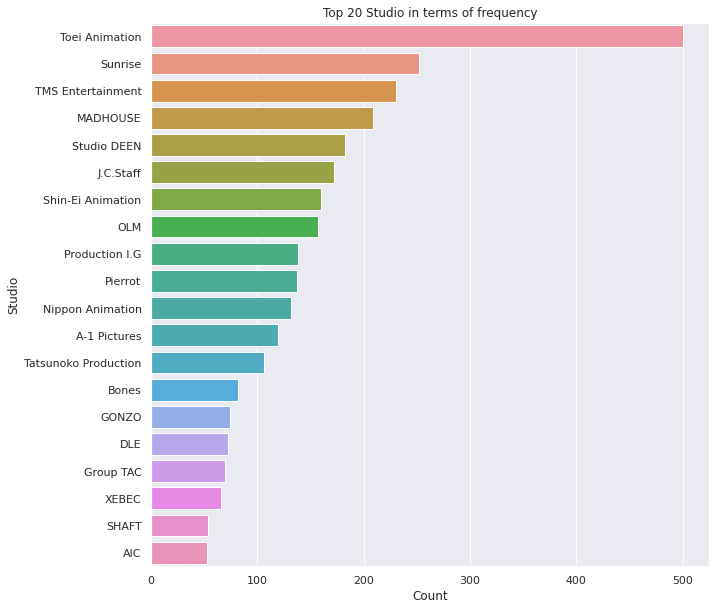

In [10]:
top_20_amount = filteredanime_data.Studio.value_counts()[:20]
top_20_amount = pd.DataFrame(top_20_amount)
top_20_amount = top_20_amount.reset_index()
top_20_amount.columns = ['Studio','Count']
#top_20_amount
f,axes=plt.subplots(figsize=(10,10))
sb.barplot(data=top_20_amount, y="Studio", x="Count").set(title='Top 20 Studio in terms of frequency')

[Text(0.5, 1.0, 'Rating stat for the top 20 Studio')]

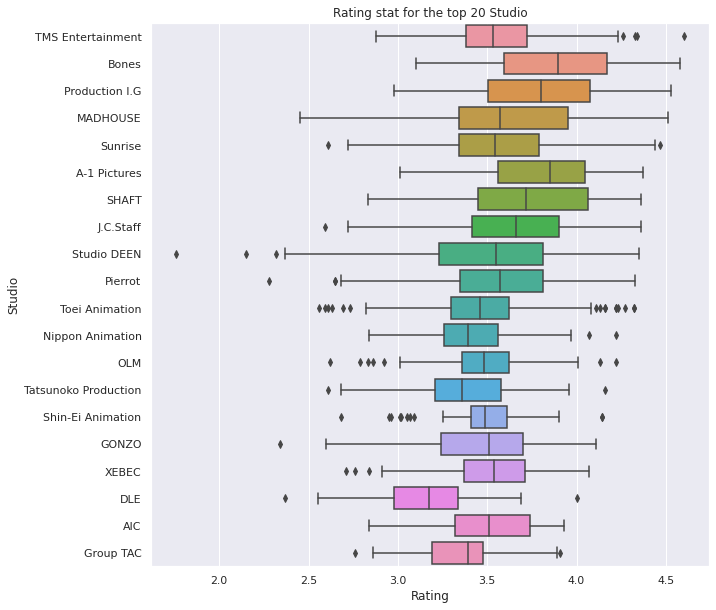

In [11]:
temp1 =filteredanime_data.Rating[filteredanime_data.Studio.isin(top_20_amount.Studio)].to_frame()
temp2 =filteredanime_data.Studio[filteredanime_data.Studio.isin(top_20_amount.Studio)].to_frame()
top_20 = pd.concat([temp2, temp1],axis=1)
temp1 = pd.DataFrame()
temp2 = pd.DataFrame()
f,axes=plt.subplots(figsize=(10,10))
sb.boxplot(data=top_20, x="Rating", y="Studio").set(title='Rating stat for the top 20 Studio')


Just with 20 studios, we can see some differences between the ratings. Studio category would be good for rating

Lastly, compare Tags to rating

In [12]:
#filteredanime_data['Tags'] = filteredanime_data['Tags'].str.replace(',, ',', ') #replaced all ,, with , to prepare column for encoding
#Tags_data = filteredanime_data['Tags'].str.get_dummies(', ') #encoding each tag

In [13]:
All_tags = filteredanime_data.Tags.str.split(', ',expand=True).stack().value_counts().head(1000).to_frame()
All_tags = pd.DataFrame(All_tags)
All_tags = All_tags.reset_index()
All_tags.columns = ['Tags','Count']
All_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tags    537 non-null    object
 1   Count   537 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.5+ KB


There is 537 tags.  
Similar to Studio, we will take the top 10 most recurring Tags

[Text(0.5, 1.0, 'Top 15 Genre in terms of frequency')]

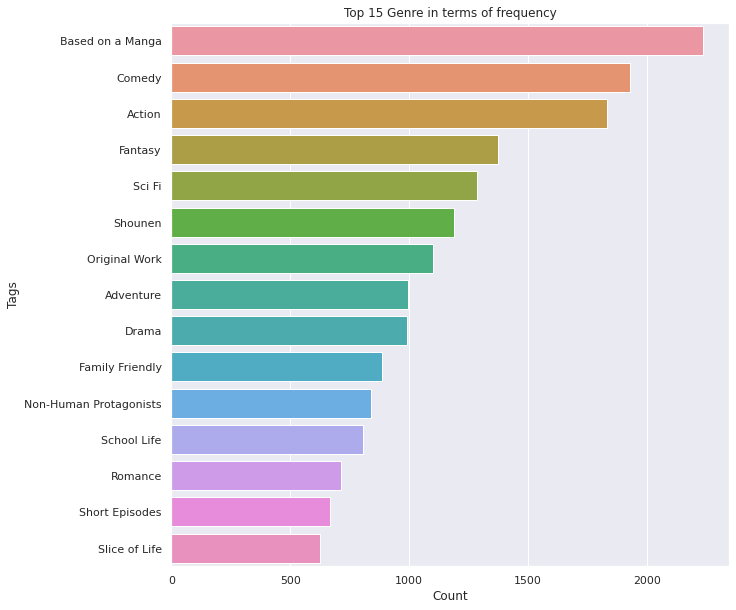

In [14]:
top_15_tags = filteredanime_data.Tags.str.split(', ',expand=True).stack().value_counts().head(15).to_frame()
top_15_tags = pd.DataFrame(top_15_tags)
top_15_tags = top_15_tags.reset_index()
top_15_tags.columns = ['Tags','Count']
top_15_tags
f,axes=plt.subplots(figsize=(10,10))
sb.barplot(data=top_15_tags, y="Tags", x="Count").set(title='Top 15 Genre in terms of frequency')

In [15]:
temp1 = filteredanime_data
temp1 = temp1.drop(columns=['Type', 'Studio','Release_year'])
temp3 = temp1
tags_data = temp3.iloc[0:0]

In [16]:
i=0
while i<15:
    temp2 = temp1
    temp2["Tags"] = temp2["Tags"].str.replace('|'.join(['Dark Fantasy', 'Contemporary Fantasy', 'Urban Fantasy','Dark Comedy','Romatic Comedy','Shounen-ai','Picture Drama','Fake Romance','Mature Romance','Romance of the Three Kingdoms']), "xx",regex=True) #this prevents the individual substring that happen to have the top 10 tags as substring from registering
    temp2.loc[temp2['Tags'].str.contains('|'.join(top_15_tags.Tags.loc[i:i])), 'Tags'] = top_15_tags.iloc[i,0]
    temp2 = temp2[temp2['Tags'].str.contains('|'.join(top_15_tags.Tags.loc[i:i]))]
    tags_data = pd.concat([tags_data, temp2], ignore_index=True)
    temp1 = filteredanime_data
    temp1 = temp1.drop(columns=['Type', 'Studio','Release_year'])
    i += 1

In [17]:
temp1 = pd.DataFrame() #empty out the dataframe to reduce space usage
temp2 = pd.DataFrame()
temp3 = pd.DataFrame()

[Text(0.5, 1.0, 'Rating of top 15 Genre')]

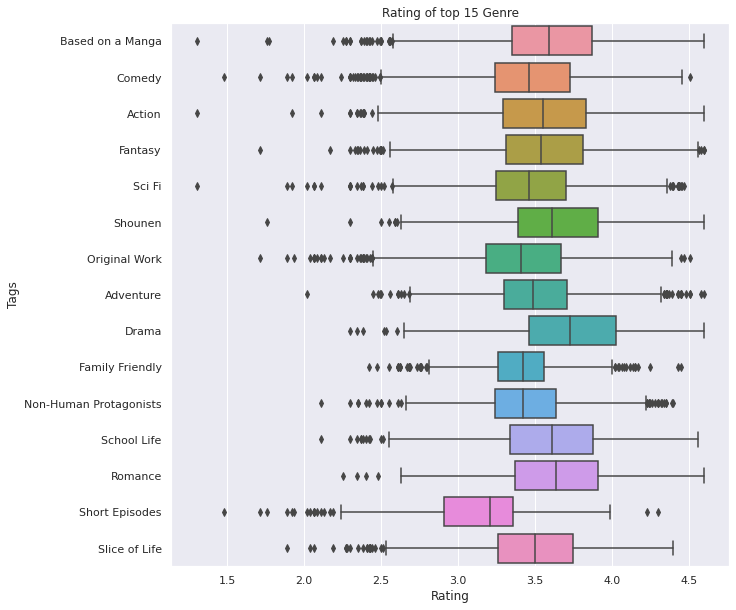

In [18]:
f,axes=plt.subplots(figsize=(10,10))
sb.boxplot(data=tags_data, x="Rating", y="Tags").set(title='Rating of top 15 Genre')

[Text(0.5, 1.0, 'Rating of top 15 Genre')]

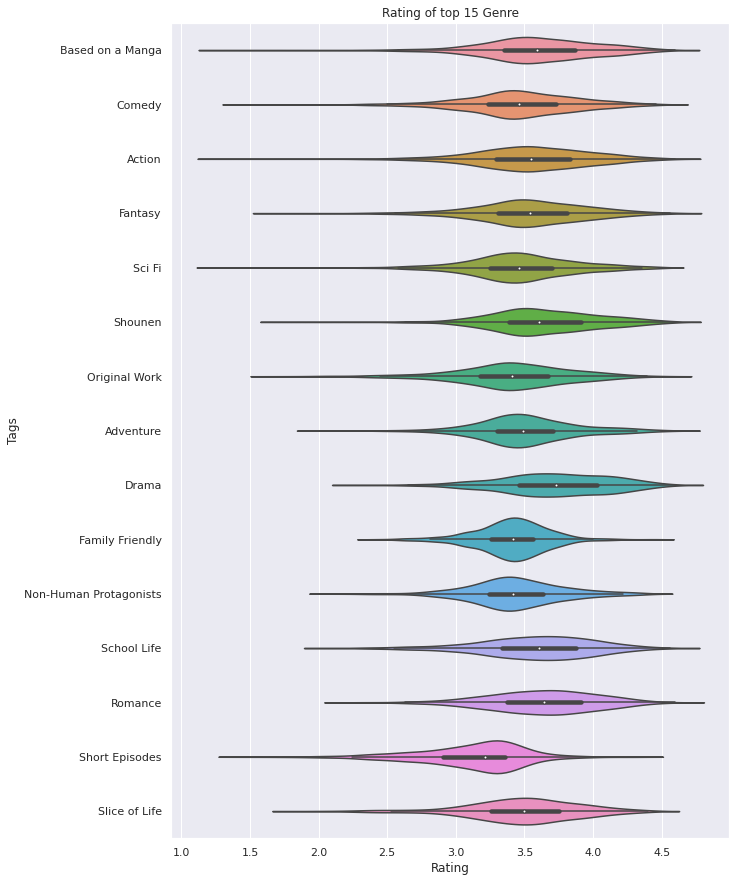

In [19]:
f,axes=plt.subplots(figsize=(10,15))
sb.violinplot(data=tags_data, x="Rating", y="Tags").set(title='Rating of top 15 Genre')

Tags is may not be as good as Studio for predicting Rating but is worthwhile looking into

EDA ENDS HERE --------------------------------------------------------------------  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=84741b16-0348-47d2-95b1-78d2d6dd8ad4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>